# Feature engineering

In [1]:
# import 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:
bids = pd.read_csv('Data/bids.csv')
bidder = pd.read_csv('Data/train.csv')

In [3]:
bidder.head(5)
bidder.shape

(2013, 4)

### train and test set

In [4]:
X_bidder = bidder.drop(['outcome'],axis=1)
y_bidder = bidder['outcome']
X_train, X_test, y_train, y_test = train_test_split(X_bidder, y_bidder, random_state=42, stratify=y_bidder)

In [5]:
df_train = pd.merge(bids, pd.concat([X_train, y_train], axis=1), on='bidder_id', how='inner')
df_test = pd.merge(bids, pd.concat([X_test, y_test], axis=1), on='bidder_id', how='inner')

In [6]:
print(df_train.shape, df_test.shape)

(2356675, 12) (714549, 12)


Encoding
- pd.concat() unisce le colonne bidder_id di df_train e df_test.
- .unique() restituisce una lista di valori univoci di bidder_id presenti in entrambi i dataset, eliminando duplicati.
- enumerate(unique_bidders) associa un indice numerico (da 0 in poi) a ciascun valore unico di bidder_id.
- Successivamente viene creata la nuova colonna 'encoded_bidder_id' e viene riempita con i valori corrispondenti nella mappa

In [7]:
unique_bidders = pd.concat([df_train['bidder_id'], df_test['bidder_id']]).unique()
bidder_mapping = {bidder_id: idx for idx, bidder_id in enumerate(unique_bidders)}
df_train['encoded_bidder_id'] = df_train['bidder_id'].map(bidder_mapping)
df_test['encoded_bidder_id'] = df_test['bidder_id'].map(bidder_mapping)

In [8]:
df_train.drop('bidder_id',axis=1,inplace=True)
df_test.drop('bidder_id',axis=1,inplace=True)

In [9]:
df_train.head(5)

,bid_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome,encoded_bidder_id
0,1,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0,0
1,25,38v0a,furniture,phone4,9759243315789473,bd,147.64.206.30,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0,0
2,39,aeqok,furniture,phone35,9759243368421052,in,75.11.239.20,i92xwb95qdo901j,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0,0
3,42,jkyzt,furniture,phone38,9759243368421052,in,215.203.78.242,s4hrzaqd5vbq2he,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0,0
4,68,h2xrf,furniture,phone57,9759243526315789,in,134.198.237.242,1euklxshlldto4z,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0,0


In [27]:
df_test

,bid_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome,encoded_bidder_id
0,44,958x1,mobile,phone42,9759243368421052,in,254.254.37.252,onbgo5s1m97rxur,ca482605ca991c5febd0c4a9fd28b6814l275,c1798623ef4c119237f11b9e6622883bsa47l,0.0,1487
1,276,38v0a,mobile,phone38,9759244631578947,in,232.98.19.153,dy77rf6vkosrlhn,ca482605ca991c5febd0c4a9fd28b6814l275,c1798623ef4c119237f11b9e6622883bsa47l,0.0,1487
2,470,sz8v4,mobile,phone47,9759245684210526,in,210.30.25.7,9ty3boywvns4a3p,ca482605ca991c5febd0c4a9fd28b6814l275,c1798623ef4c119237f11b9e6622883bsa47l,0.0,1487
3,693,19fz7,mobile,phone3,9759246947368421,in,166.108.111.41,ezydp6vg4kwxi0m,ca482605ca991c5febd0c4a9fd28b6814l275,c1798623ef4c119237f11b9e6622883bsa47l,0.0,1487
4,804,19fz7,mobile,phone3,9759247631578947,in,166.108.111.41,ezydp6vg4kwxi0m,ca482605ca991c5febd0c4a9fd28b6814l275,c1798623ef4c119237f11b9e6622883bsa47l,0.0,1487
...,...,...,...,...,...,...,...,...,...,...,...,...
714544,7619267,vp7uk,home goods,phone22,9709051315789473,au,79.33.249.99,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c2283b82i,60514906c638e30bf583fe0c781bf506j69e9,1.0,1982
714545,7619426,596fl,home goods,phone22,9709052052631578,au,79.33.249.99,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c2283b82i,60514906c638e30bf583fe0c781bf506j69e9,1.0,1982
714546,7620459,596fl,home goods,phone22,9709057157894736,au,79.33.249.99,rzfurpu12xsox3o,a3d2de7675556553a5f08e4c88d2c2283b82i,60514906c638e30bf583fe0c781bf506j69e9,1.0,1982
714547,7620584,obu1s,home goods,phone22,9709057736842105,au,79.33.249.99,rzfurpu12xsox3o,a3d2de7675556553a5f08e4c88d2c2283b82i,60514906c638e30bf583fe0c781bf506j69e9,1.0,1982


### Extract auction_count and device_count


In [11]:
def count_for_bidder(bidder_id, feature, df):
	return df[df['encoded_bidder_id'] == bidder_id][feature].nunique()

bidders_train = pd.DataFrame(df_train['encoded_bidder_id'].unique(), columns=['encoded_bidder_id'])
# Estrae i valori univoci dalla colonna encoded_bidder_id in df_train.
# Li converte in un nuovo DataFrame chiamato bidders_train, che ha una singola colonna encoded_bidder_id.

bidders_test = pd.DataFrame(df_test['encoded_bidder_id'].unique(), columns=['encoded_bidder_id'])

features = ['auction', 'device', 'bid_id', 'ip', 'url']

for feature in features:
	bidders_train[feature + '_count'] = bidders_train['encoded_bidder_id'].apply(lambda bidder: count_for_bidder(bidder, feature, df_train))
	bidders_test[feature + '_count'] = bidders_test['encoded_bidder_id'].apply(lambda bidder: count_for_bidder(bidder, feature, df_test))

### Add the average number of bids a user placed per referring URL

In [28]:
# Label Encoding for url, bid_id, bidder_id 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_train["url"] = encoder.fit_transform(df_train['url'])
df_test["url"] = encoder.fit_transform(df_test['url'])

# Group by bidder_id and url and count number of bids for every group
bids_per_url_train = df_train.groupby(['encoded_bidder_id', 'url'])['bid_id'].count().reset_index(name='bid_count')
bids_per_url_test = df_test.groupby(['encoded_bidder_id', 'url'])['bid_id'].count().reset_index(name='bid_count')

# Calculate the mean
average_bids_per_user_train = bids_per_url_train.groupby('encoded_bidder_id')['bid_count'].mean().reset_index(name='avg_bids_per_url')
average_bids_per_user_test = bids_per_url_test.groupby('encoded_bidder_id')['bid_count'].mean().reset_index(name='avg_bids_per_url')


In [29]:
average_bids_per_user_test

,encoded_bidder_id,avg_bids_per_url
0,1487,2.243692
1,1488,1.378698
2,1489,1.800000
3,1490,98.000000
4,1491,5.500000
...,...,...
492,1979,1.000000
493,1980,1.000000
494,1981,1.000000
495,1982,91.500000


### Join average bids per user with bidder_train and bidder_test

In [32]:

bidders_train = pd.merge(bidders_train, average_bids_per_user_train, on='encoded_bidder_id', how='outer')
bidders_test = pd.merge(bidders_test, average_bids_per_user_test, on='encoded_bidder_id', how='outer')

### Bidders_trains:
un nuovo dataframe con chiave "encoded_bidder_id", per cui ha solo 1487 samples

In [33]:
bidders_train.shape

(1487, 7)

In [34]:
bidders_test.shape

(497, 7)

### Add bid_auction
- float feature
- total auction that a bidder partecipate

In [35]:
bidders_train['bid_per_auction'] = bidders_train['bid_id_count']/bidders_train['auction_count']
bidders_test['bid_per_auction'] = bidders_test['bid_id_count']/bidders_test['auction_count']
# print(bidders_train["bid_per_auction"].describe())
bidders_test.head(5)

,encoded_bidder_id,auction_count,device_count,bid_id_count,ip_count,url_count,avg_bids_per_url,bid_per_auction
0,1487,252,348,3379,2520,1506,2.243692,13.408730
1,1488,103,166,1165,414,845,1.378698,11.310680
2,1489,16,36,63,50,35,1.800000,3.937500
3,1490,33,4,294,280,3,98.000000,8.909091
4,1491,10,9,22,17,4,5.500000,2.200000


### Training and test with new features

### First:
- create a new dataframe to maintain the originale and its features untouched
- merge the new founded features in the df_train and df_test
- drop the old features
- encode 'merchandise'

In [36]:
# Join between bidders_train and df_train
df_train_with_new_features = pd.merge(bidders_train, df_train, on='encoded_bidder_id', how='inner')
df_train_with_new_features.drop(["encoded_bidder_id", "bid_id","auction", "device", "address", "payment_account", "time", "country", "ip", "url"], axis=1, inplace=True)

df_test_with_new_features = pd.merge(bidders_test, df_test, on='encoded_bidder_id', how='inner')
df_test_with_new_features.drop(["encoded_bidder_id", "bid_id","auction", "device", "address", "payment_account", "time", "country", "ip", "url"], axis=1, inplace=True)

# Encoding 'merchandise'
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_train_with_new_features["merchandise"] = encoder.fit_transform(df_train_with_new_features['merchandise'])
df_test_with_new_features["merchandise"] = encoder.fit_transform(df_test_with_new_features['merchandise'])

# Convert 'outcome' in type int
df_train_with_new_features['outcome'] = df_train_with_new_features['outcome'].astype(int)
df_test_with_new_features['outcome'] = df_test_with_new_features['outcome'].astype(int)
df_train_with_new_features.head(5)


,auction_count,device_count,bid_id_count,ip_count,url_count,avg_bids_per_url,bid_per_auction,merchandise,outcome
0,594,1029,19988,10316,4527,4.415286,33.649832,4,0
1,594,1029,19988,10316,4527,4.415286,33.649832,4,0
2,594,1029,19988,10316,4527,4.415286,33.649832,4,0
3,594,1029,19988,10316,4527,4.415286,33.649832,4,0
4,594,1029,19988,10316,4527,4.415286,33.649832,4,0


### Then:
- train a Decision Tree model and see what happens

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92    665084
           1       0.16      0.24      0.19     49465

    accuracy                           0.86    714549
   macro avg       0.55      0.58      0.56    714549
weighted avg       0.89      0.86      0.87    714549



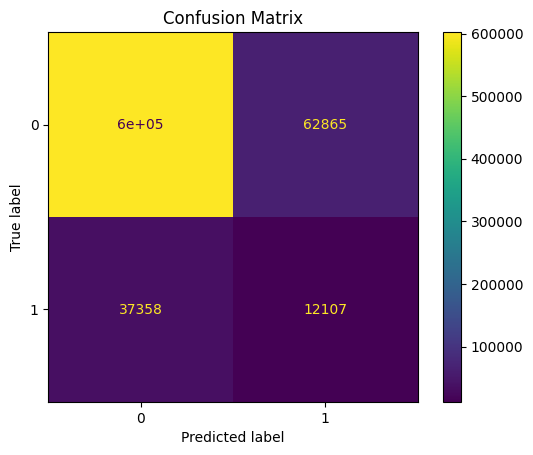

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X_train_new_features = df_train_with_new_features.drop(['outcome'],axis=1)
y_train_new_features = df_train_with_new_features['outcome']
X_test_new_features = df_test_with_new_features.drop(['outcome'],axis=1)
y_test_new_features = df_test_with_new_features['outcome']
# print(X_with_new_features.head(5))
# print(y_with_new_features.head(5))
# X_train_new_features, X_test_new_features, y_train_new_features, y_test_new_features = train_test_split(X_with_new_features, y_with_new_features, test_size=0.3, random_state=42, stratify=y_with_new_features)

dt_with_new_features_count = DecisionTreeClassifier()
dt_with_new_features_count.fit(X_train_new_features, y_train_new_features)
y_pred_with_new_features_count = dt_with_new_features_count.predict(X_test_new_features)

cr_new_features = classification_report(y_test_new_features, y_pred_with_new_features_count)
print("Classification Report:")
print(cr_new_features)

from sklearn.metrics import ConfusionMatrixDisplay
cm_dt_with_new_features = ConfusionMatrixDisplay.from_estimator(dt_with_new_features_count, X_test_new_features, y_test_new_features)

import os
from datetime import datetime
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
output_dir = f"Outputs/output_{timestamp}"
os.makedirs(output_dir, exist_ok=True)
image_path = os.path.join(output_dir, 'Confusion Matrix.png')

import matplotlib.pyplot as plt
plt.title('Confusion Matrix')
plt.savefig(image_path, dpi=300, bbox_inches='tight')

class_report_path = os.path.join(output_dir, 'Classification_report.txt')
with open(class_report_path, 'w') as f:
    f.write(cr_new_features)

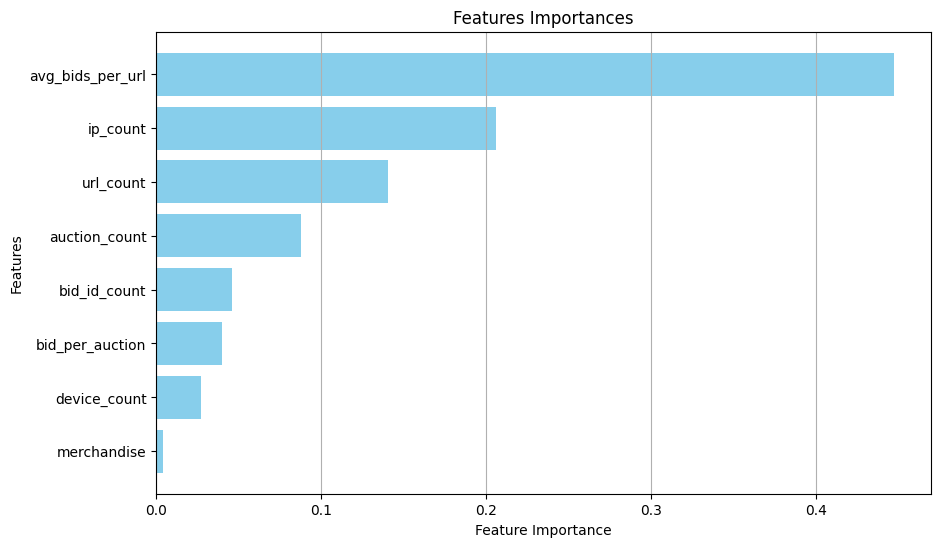

In [48]:
import numpy as np

# Ottieni le importanze delle feature
feature_importances = dt_with_new_features_count.feature_importances_

# Ordina le feature per importanza decrescente
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = X_train_new_features.columns[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances in DecisionTreeClassifier")
plt.gca().invert_yaxis()  # Inverti l'asse Y per avere la feature più importante in alto
plt.grid(axis='x')

fea_importance_path = os.path.join(output_dir, 'Feature_importances.png')
plt.title('Features Importances')
plt.savefig(fea_importance_path, dpi=300, bbox_inches='tight')

In [99]:
# from fep import FEP, load_features
# pipeline = FEP("prova.csv")
# pipeline.save_features(df_train)